 <p style = "font-size: 40px;font-weight: bold;text-align:center;color:#0000FF"> Polynomial Linear Regression </p>


<p style="font-size:100%;text-align:left;font-weight:bold"> Created by  : Ravi kumar
<p style="font-size:100%;text-align:left;font-weight:bold;"> Last edited : 02/04/2022

**Assumptions of Linear Regression**

- There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s)

- The independent variables should not be correlated. Absence of this phenomenon is known as **multicollinearity**

- No auto correaltion

**Difference between Logistic regression and Linear regression**

- Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output

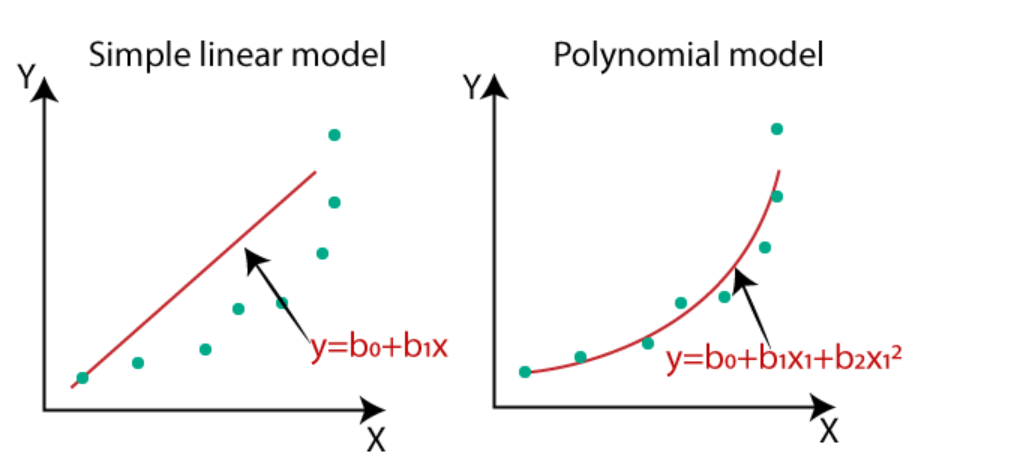

**Step by step process to Choose the right variable to use in model**

-  **Select all varible and train your model on it** - Follow this step only when you know that all the variables are equally important

-  **Backward Elimination** - 
   - Select a significance level of 0.05
   - Train the full model
   - If the P value for the varible is higher than SL then eliminate it else keep it
   - Retrain the model
 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Reading the dataset

In [10]:
#CSV file
df = pd.read_csv("Position_Salaries.csv")
print("Unique positions: \n",df['Position'].unique(),'\n')
print("Number of Unique positions : ",df['Position'].nunique(),'\n')
print("Unique Levels: \n",df['Level'].unique(),'\n')
print("Number of Unique Levels : ",df['Level'].nunique())
display(df.head(5))
print(df.shape)

Unique positions: 
 ['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO'] 

Number of Unique positions :  10 

Unique Levels: 
 [ 1  2  3  4  5  6  7  8  9 10] 

Number of Unique Levels :  10


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


(10, 3)


- Here we have one column as Position on Level
- We have to create a Polynomial Linear regressor that fits the data in a Parabolic line

**Polynomial Linear Regression**

**y= b0+b1x1+ b2x12+ b2x13+...... bnx1n**

- x is independent variable 
- Y is a dependent variable

## Checking for NULL values

In [11]:
#checking for NULL
print(df.isnull().sum()*100/df.shape[0])

Position    0.0
Level       0.0
Salary      0.0
dtype: float64


- Now we know that we don't have any NULL value in our dataset so that we can proceed further

## Splitting the Train and Test data

In [12]:
#Getting X and y variable
X = df.drop(['Salary','Position'],axis=1)
y =df['Salary']

In [13]:
display(X.head())
print("Shape of X ",X.shape)
print("\n\n")
display(y.head().reset_index())
print("Shape of y", y.shape)

,Level
0,1
1,2
2,3
3,4
4,5


Shape of X  (10, 1)





,index,Salary
0,0,45000
1,1,50000
2,2,60000
3,3,80000
4,4,110000


Shape of y (10,)


Thou our data is so small we are not spliting the data into Test and Train data

In [16]:
#Creating a model object and fiting the data
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

## Polynomial With Degree two

In [17]:
p_reg = PolynomialFeatures(degree = 2)
X_poly = p_reg.fit_transform(X)

#again create new linear regression obj
reg2 = LinearRegression()
reg2.fit(X_poly,y)

## Visualize Linear regression model

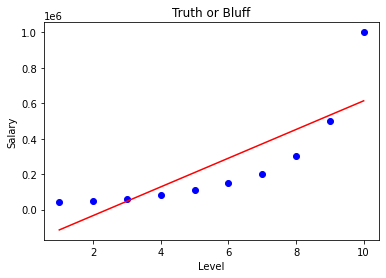

In [21]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")

# predicted values
plt.plot(X, reg.predict(X), color='r')
plt.show()

## Visualize Polynomial regression model

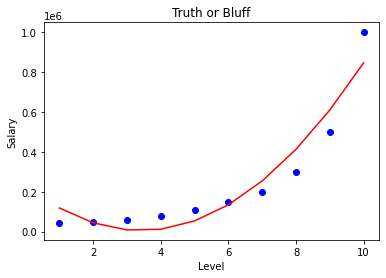

In [22]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")

# predicted values
plt.plot(X, reg2.predict(X_poly), color='r')
plt.show()

## Polynomial With Degree 3

In [23]:
#improve degree = 3
p_reg = PolynomialFeatures(degree = 3)
X_poly = p_reg.fit_transform(X)

#again create new linear regression obj
reg2 = LinearRegression()
reg2.fit(X_poly,y)

LinearRegression()

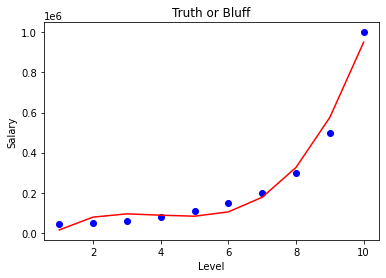

In [24]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")

# predicted values
plt.plot(X, reg2.predict(X_poly), color='r')
plt.show()

## Polynomial With Degree 4

In [26]:
#improve degree = 4
p_reg = PolynomialFeatures(degree = 4)
X_poly = p_reg.fit_transform(X)

#again create new linear regression obj
reg2 = LinearRegression()
reg2.fit(X_poly,y)

LinearRegression()

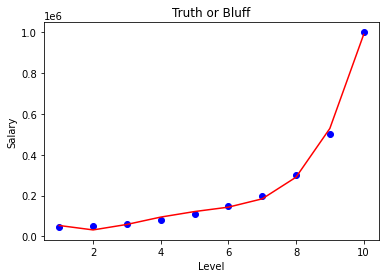

In [27]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")

# predicted values
plt.plot(X, reg2.predict(X_poly), color='r')
plt.show()

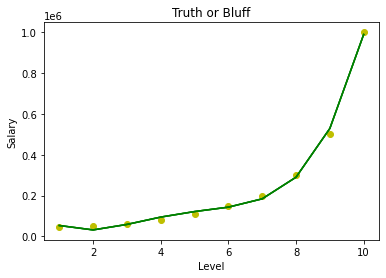

In [32]:
#improve degree = 3
p_reg1 = PolynomialFeatures(degree = 3)
X_poly1 = p_reg.fit_transform(X)

p_reg2 = PolynomialFeatures(degree = 4)
X_poly2 = p_reg.fit_transform(X)

p_reg3 = PolynomialFeatures(degree = 5)
X_poly3 = p_reg.fit_transform(X)

#again create new linear regression obj
reg1 = LinearRegression()
reg1.fit(X_poly1,y)

reg2 = LinearRegression()
reg2.fit(X_poly2,y)

reg3 = LinearRegression()
reg3.fit(X_poly3,y)

l = [X_poly1, X_poly2, X_poly3]
l2 = [reg1, reg2, reg3]
zip_object = zip(l, l2)



plt.scatter(X, y, color = 'y')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")



# predicted values
for p,q in zip_object:
    plt.plot(X, q.predict(p), color='g')

plt.show()